<a href="https://colab.research.google.com/github/RUMONMD89/Data-Science/blob/main/class3%20Dataframes%20and%20operations%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.4 データフレーム

### 3.4.1 データフレームの作成(Create data frame)

In [ ]:
import pandas as pd

#### 3.4.1.1 データを列ごとに記述する方法(How to describe the data column by column)

In [ ]:
my_df = pd.DataFrame({
    'name':    ['A', 'B', 'C', 'D'],
    'english': [ 60,  90,  70,  90],
    'math':    [ 70,  80,  90, 100],
    'gender':  ['f', 'm', 'm', 'f']})

#### 3.4.1.2 データを見た目のとおりに記述する方法(How to describe data as it looks)

In [ ]:
my_df = pd.DataFrame([
    ['A', 60,  70, 'f'],
    ['B', 90,  80, 'm'],
    ['C', 70,  90, 'm'],
    ['D', 90, 100, 'f']],
    columns=['name', 'english',
             'math', 'gender'])

In [ ]:
my_df.head()
# 結果は割愛

,name,english,math,gender
0,A,60,70,f
1,B,90,80,m
2,C,70,90,m
3,D,90,100,f


#### 3.4.1.3 データフレームのサイズ(the size of the dataframe)

In [ ]:
r, c = my_df.shape # 行数と列数
r, c
#> (4, 4)

r # 行数（len(my_df)も可）
#> 4

c # 列数
#> 4

4

#### 3.4.1.4 組合せ(combination)

In [ ]:
from itertools import product
my_df2 = pd.DataFrame(
    product([1, 2, 3],
            [10, 100]),
    columns=['X', 'Y'])
my_df2
#>    X    Y
#> 0  1   10
#> 1  1  100
#> 2  2   10
#> 3  2  100
#> 4  3   10
#> 5  3  100

,X,Y
0,1,10
1,1,100
2,2,10
3,2,100
4,3,10
5,3,100


#### 3.4.1.5 列と行の名前(column and row names)

In [ ]:
my_df2.columns
#> Index(['X', 'Y'], dtype='object')

Index(['X', 'Y'], dtype='object')

In [ ]:
my_df2.columns = ['P', 'Q']
my_df2
#>    P    Q
#> 0  1   10
#> 1  1  100
# 以下省略

,P,Q
0,1,10
1,1,100
2,2,10
3,2,100
4,3,10
5,3,100


In [ ]:
list(my_df.index)
#> [0, 1, 2, 3]

[0, 1, 2, 3]

In [ ]:
my_df2.index = [
    'a', 'b', 'c', 'd', 'e', 'f']
my_df2
#>    P    Q
#> a  1   10
#> b  1  100
#> c  2   10
# 以下省略

,P,Q
a,1,10
b,1,100
c,2,10
d,2,100
e,3,10
f,3,100


In [ ]:
my_df3 = pd.DataFrame({
    'english': [ 60,  90,  70,  90],
    'math':    [ 70,  80,  90, 100],
    'gender':  ['f', 'm', 'm', 'f']},
    index=     ['A', 'B', 'C', 'D'])
my_df3
#>    english  math gender
#> A       60    70      f
#> B       90    80      m
#> C       70    90      m
#> D       90   100      f

,english,math,gender
A,60,70,f
B,90,80,m
C,70,90,m
D,90,100,f


### 3.4.2 データの追加

#### 3.4.2.1 行の追加（データフレームの結合）[Appending rows (combining dataframes)]

In [ ]:
tmp = pd.DataFrame({
    'name'   : ['E'],
    'english': [80],
    'math'   : [80],
    'gender' : ['m']})
my_df2 = my_df.append(tmp)

#### 3.4.2.2 列の追加(Add Column)

In [ ]:
my_df2 = my_df.assign(id=[1, 2, 3, 4])

In [ ]:
my_df3 = my_df.copy()       # コピー
my_df3['id'] = [1, 2, 3, 4] # 更新
my_df3 # 結果の確認（割愛）

,name,english,math,gender,id
0,A,60,70,f,1
1,B,90,80,m,2
2,C,70,90,m,3
3,D,90,100,f,4


### 3.4.3 データの取り出し

#### 3.4.3.1 観測値の取り出し(Retrieval of Observations)

In [ ]:
my_df.iloc[0, 1]
#> 60

60

#### 3.4.3.2 1列の取り出し（結果は1次元データ）[Column retrieval (result is one-dimensional data)]

In [ ]:
x = my_df.iloc[:, 1]
# あるいは
x = my_df['english']
# あるいは
x = my_df.english
# あるいは
tmp = 'english'
x = my_df[tmp]

x # 結果の確認（割愛）

0    60
1    90
2    70
3    90
Name: english, dtype: int64

#### 3.4.3.3 複数列の取り出し（結果はデータフレーム）[Multi-column retrieval (result is a dataframe)]

In [ ]:
x = my_df[['name', 'math']]
# あるいは
x = my_df.loc[:, ['name', 'math']]

In [ ]:
x = my_df.take([0, 2], axis=1)
# あるいは
x = my_df.iloc[:, [0, 2]]

In [ ]:
x = my_df.drop(
    columns=['english', 'gender'])
# あるいは
x = my_df.drop(
    columns=my_df.columns[[1, 3]])

#### 3.4.3.4 複数行の取り出し（結果はデータフレーム）[Multi-row retrieval (result is a dataframe)]

In [ ]:
x = my_df.take([0, 2])
# あるいは
x = my_df.iloc[[0, 2], :]

In [ ]:
x = my_df.drop([1, 3])

#### 3.4.3.5 検索

In [ ]:
x = my_df[my_df['gender'] == 'm']
# あるいは
x = my_df.query('gender == "m"')

In [ ]:
x = my_df[(my_df['english'] > 80) & (my_df['gender'] == "m")]
# あるいは
x = my_df.query('english > 80 and gender == "m"')

In [ ]:
x = my_df[my_df['english'] == my_df['english'].max()]
# あるいは
tmp = my_df['english'].max()
x = my_df.query('english == @tmp')

In [ ]:
my_df2 = my_df.copy() # コピー
my_df2.loc[my_df['gender'] == 'm', 'gender'] = 'M'

In [ ]:
my_df2
#>   name  english  math gender
#> 0    A       60    70      f
#> 1    B       90    80      M
#> 2    C       70    90      M
#> 3    D       90   100      f

,name,english,math,gender
0,A,60,70,f
1,B,90,80,M
2,C,70,90,M
3,D,90,100,f


#### 3.4.3.6 並べ替え(Sorting)

In [ ]:
x = my_df.sort_values('english')

In [ ]:
x = my_df.sort_values('english',
    ascending=False)

### 3.4.4 補足：行列(Supplement: Matrix)

#### 3.4.4.1 行列の生成(matrix generation)

In [ ]:
import numpy as np
x = [2, 3, 5, 7, 11, 13, 17, 19, 23,
     29, 31, 37]
A = np.array(x).reshape(3, 4)
A
#> array([[ 2,  3,  5,  7],
#>        [11, 13, 17, 19],
#>        [23, 29, 31, 37]])

array([[ 2,  3,  5,  7],
       [11, 13, 17, 19],
       [23, 29, 31, 37]])

#### 3.4.4.2 データフレームと行列(dataframes and matrices)

In [ ]:
A = my_df.iloc[:, [1, 2]].values
A
#> array([[ 60,  70],
#>        [ 90,  80],
#>        [ 70,  90],
#>        [ 90, 100]])

array([[ 60,  70],
       [ 90,  80],
       [ 70,  90],
       [ 90, 100]])

In [ ]:
pd.DataFrame(A)
#>     0    1
#> 0  60   70
#> 1  90   80
#> 2  70   90
#> 3  90  100

,0,1
0,60,70
1,90,80
2,70,90
3,90,100


#### 3.4.4.3 行列の変形(matrix transformation)

In [ ]:
A.T
#> array([[ 60,  90,  70,  90],
#>        [ 70,  80,  90, 100]])

array([[ 60,  90,  70,  90],
       [ 70,  80,  90, 100]])

#### 3.4.4.4 行列の積(matrix product)

In [ ]:
A.T @ A
#> array([[24700, 26700],
#>        [26700, 29400]])

array([[24700, 26700],
       [26700, 29400]])

### 3.4.5 縦型と横型(vertical and horizontal)

In [ ]:
my_df = pd.DataFrame({
    'day': [25, 26, 27],
    'min': [20, 21, 15],
    'max': [24, 27, 21]})

In [ ]:
my_longer = my_df.melt(id_vars='day')
my_longer
#>    day variable  value
#> 0   25      min     20
#> 1   26      min     21
#> 2   27      min     15
#> 3   25      max     24
#> 4   26      max     27
#> 5   27      max     21

,day,variable,value
0,25,min,20
1,26,min,21
2,27,min,15
3,25,max,24
4,26,max,27
5,27,max,21


In [ ]:
my_wider = my_longer.pivot(
    index='day',
    columns='variable',
    values='value')
my_wider
#> variable  max  min
#> day
#> 25         24   20
#> 26         27   21
#> 27         21   15

variable,max,min
day,,
25,24,20
26,27,21
27,21,15


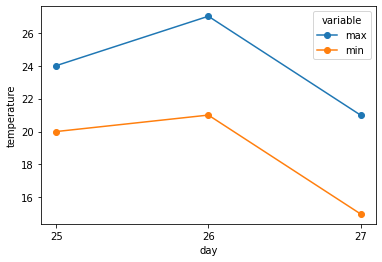

In [ ]:
my_wider.plot(
    style='o-',
    xticks=my_wider.index, # x軸目盛り
    ylabel='temperature')  # y軸ラベル

## 3.5 1次元データの（非）類似度((dis)similarity of 1D data)

### 3.5.1 ユークリッド距離(euclidean distance)

In [ ]:
import numpy as np
from scipy.spatial import distance
from scipy.stats import pearsonr

A = np.array([3,   4,  5])
B = np.array([3,   4, 29])
C = np.array([9, -18,  8])

distance.euclidean(A, B)
#> 24.0

distance.euclidean(A, C)
#> 23.0

23.0

### 3.5.2 マンハッタン距離(manhattan distance)

In [ ]:
distance.cityblock(A, B)
#> 24

distance.cityblock(A, C)
#> 31

31

### 3.5.3 コサイン類似度(cosine similarity)

In [ ]:
1 - distance.cosine(A, B)
#> 0.8169678632647616

1 - distance.cosine(A, C)
#> -0.032651157422416865

-0.032651157422416865

### 3.5.4 相関係数(correlation coefficient)

In [ ]:
1 - distance.correlation(A, B)
# あるいは
pearsonr(A, B)[0]
#> 0.8824975032927698

1 - distance.correlation(A, C)
# あるいは
pearsonr(A, C)[0]
#> -0.032662766723200676

-0.032662766723200676

#### 3.5.4.1 データフレームを使う方法(How to use dataframe)

In [ ]:
# 小数点以下は3桁表示
np.set_printoptions(precision=3)
import pandas as pd

my_df = pd.DataFrame({
    'x': [3,  3,   9],
    'y': [4,  4, -18],
    'z': [5, 29,   8]},
    index=['A', 'B', 'C'])

# ユークリッド距離
distance.cdist(my_df, my_df,
               metric='euclidean')
#> array([[ 0., 24., 23.],
#>        [24.,  0., 31.],
#>        [23., 31.,  0.]])

# マンハッタン距離
distance.cdist(my_df, my_df,
               metric='cityblock')
#> array([[ 0., 24., 31.],
#>        [24.,  0., 49.],
#>        [31., 49.,  0.]])

# コサイン類似度
1 - distance.cdist(my_df, my_df,
    metric='cosine')
#> array([[ 1.   ,  0.817, -0.033],
#>        [ 0.817,  1.   ,  0.293],
#>        [-0.033,  0.293,  1.   ]])

# 相関係数
1 - distance.cdist(my_df, my_df,
    metric='correlation')
#> array([[ 1.   ,  0.882, -0.033],
#>        [ 0.882,  1.   ,  0.441],
#>        [-0.033,  0.441,  1.   ]])

array([[ 1.   ,  0.882, -0.033],
       [ 0.882,  1.   ,  0.441],
       [-0.033,  0.441,  1.   ]])